In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


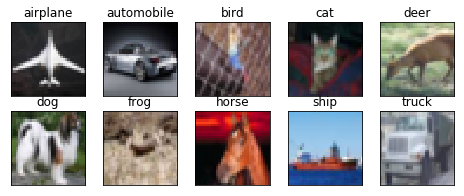

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
#base model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0722 13:40:44.721551 140188454328192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0722 13:40:44.758914 140188454328192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 13:40:44.768157 140188454328192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0722 13:40:45.312900 140188454328192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 16s 42ms/step - loss: 1.8737 - acc: 0.2834 - val_loss: 1.5386 - val_acc: 0.4330
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3643 - acc: 0.5069 - val_loss: 1.1445 - val_acc: 0.5896
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1537 - acc: 0.5919 - val_loss: 1.0246 - val_acc: 0.6360
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 1.0093 - acc: 0.6462 - val_loss: 0.9507 - val_acc: 0.6733
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.9246 - acc: 0.6778 - val_loss: 0.8133 - val_acc: 0.7166
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8452 - acc: 0.7095 - val_loss: 0.7704 - val_acc: 0.7336
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7782 - acc: 0.7306 - val_loss: 0.7672 - val_acc: 0.7337
Epoch 8/100
390/390 [==============================] - 9s 23m

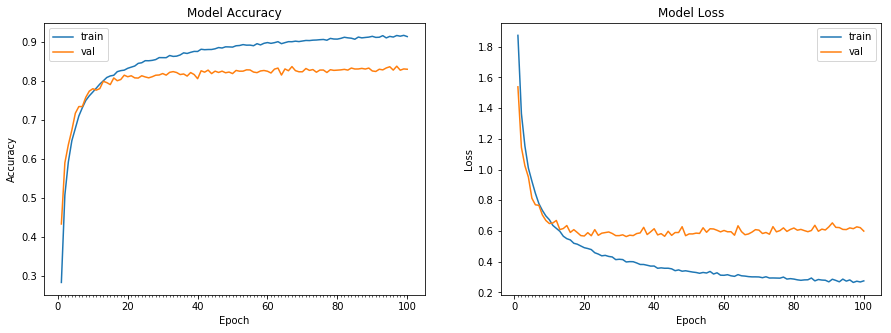

Accuracy on test data is: 82.92


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###redefined model


In [12]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu')) #30x30
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))  #28x28
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))#15x15

model.add(Convolution2D(128, 3, 3, border_mode='same'))  #15x15
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Convolution2D(128, 3, 3, border_mode='same')) #15x15
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) #5x5


model.add(Convolution2D(128, 3, 3, border_mode='same')) #15x15
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) #8x8

model.add(Convolution2D(64, 3, 3))  #5x5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3))  #3x3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3))  #1x3
model.add(Activation('relu'))


model.add(Convolution2D(10, 1,1))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

print(num_classes)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0722 13:55:45.971317 140188454328192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: Use

10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
__________

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 21s 54ms/step - loss: 1.5529 - acc: 0.4507 - val_loss: 1.6557 - val_acc: 0.4229
Epoch 2/100
390/390 [==============================] - 19s 49ms/step - loss: 1.0033 - acc: 0.6466 - val_loss: 1.0694 - val_acc: 0.6398
Epoch 3/100
390/390 [==============================] - 19s 48ms/step - loss: 0.7919 - acc: 0.7228 - val_loss: 1.0651 - val_acc: 0.6584
Epoch 4/100
390/390 [==============================] - 19s 48ms/step - loss: 0.6836 - acc: 0.7638 - val_loss: 0.9189 - val_acc: 0.6878
Epoch 5/100
390/390 [==============================] - 19s 48ms/step - loss: 0.6106 - acc: 0.7896 - val_loss: 0.7545 - val_acc: 0.7461
Epoch 6/100
390/390 [==============================] - 19s 48ms/step - loss: 0.5492 - acc: 0.8093 - val_loss: 0.8072 - val_acc: 0.7282
Epoch 7/100
390/390 [==============================] - 19s 48ms/step - loss: 0.5023 - acc: 0.8272 - val_loss: 0.6924 - val_acc: 0.7675
Epoch 8/100
390/390 [==============================] - 

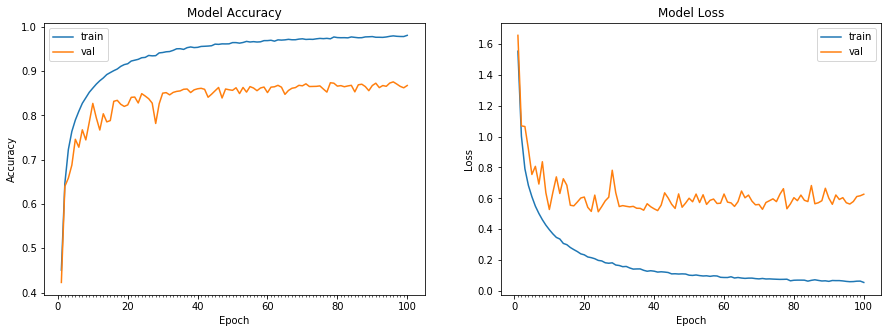

Accuracy on test data is: 86.75


In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from google.colab import drive

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab_Models/'

checkpoint = ModelCheckpoint(root_path+'model_assignment_7.best-accuracy.hdfs', save_best_only=True,monitor='val_acc')
callback_list=[checkpoint]

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callback_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



### Model accuracy is 88.13% in the 97th epoch which is higher than the base accuracy.

In [36]:
from keras.models import load_model

from google.colab import drive


drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab_Models/'

root_path = 'gdrive/My Drive/Colab_Models/'
model = load_model(root_path+'model_assignment_7.best-accuracy.hdfs')

from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys


pred = model.predict(test_features[:10])
class_idx = np.argmax(pred[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("activation_14")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([test_features[:10]])

    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
__________

In [38]:

print(conv_layer_output_value, (conv_layer_output_value[0]))

for i in range(3):
    conv_layer_output_value[i] *= pooled_grads_value

[[[ 0.          1.8998245   0.         ...  5.528818    0.
    0.        ]
  [ 0.          0.          0.         ...  6.844037    0.
    0.        ]
  [ 0.          6.947622    0.         ...  0.          0.
    0.        ]
  [ 1.6551429   0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 4.930754   10.155748    0.21471888 ...  2.6200576   0.
    0.        ]
  [ 8.120659    0.         25.897898   ... 15.358097    0.
    1.2015227 ]
  [ 4.323599    0.         11.28542    ...  0.          0.
    0.        ]
  [ 4.252797    0.          6.340357   ...  0.          0.
    0.        ]
  [ 0.         10.296629   27.618345   ...  0.          0.
    3.8400273 ]]

 [[23.151424    1.059172    0.         ...  0.          0.
    4.9630656 ]
  [16.099472    0.         15.993472   ...  8.969393    0.
   14.454671  ]
  [ 1.9222661   0.          7.7354746  ...  0.25864303  0.
    0.        ]
  [12.947513    0.   

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

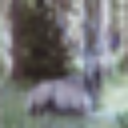

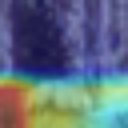

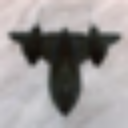

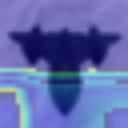

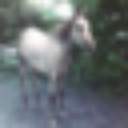

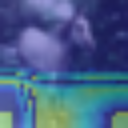

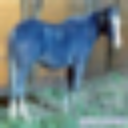

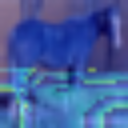

In [40]:
from google.colab.patches import cv2_imshow

(Train_features, Train_labels), (Test_features, Test_labels) = cifar10.load_data()
imgs = []
#for i in range(0,200,66):
#  imgs.append(Test_features[i])
imgs = [Test_features[314], Test_features[315], Test_features[316], Test_features[317]]
  
for img in imgs:
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img.astype('float32'), 0.6, heatmap.astype('float32'), 0.4, 0)
  img = cv2.resize(img, (128, 128))
  cv2_imshow(img)
  superimposed_img = cv2.resize(superimposed_img, (128,128))
  cv2_imshow(superimposed_img)

#print("\n\n")



In [20]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
from random_eraser import get_random_eraser



--2019-07-22 14:38:59--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py’

random_eraser.py    100%[===================>]     888  --.-KB/s    in 0s      

2019-07-22 14:38:59 (163 MB/s) - ‘random_eraser.py’ saved [888/888]



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


390/390 [==============================] - 20s 51ms/step - loss: 0.3394 - acc: 0.8909 - val_loss: 0.4685 - val_acc: 0.8621
Epoch 2/100
390/390 [==============================] - 19s 48ms/step - loss: 0.2754 - acc: 0.9066 - val_loss: 0.4683 - val_acc: 0.8654
Epoch 3/100
390/390 [==============================] - 19s 48ms/step - loss: 0.2588 - acc: 0.9116 - val_loss: 0.4433 - val_acc: 0.8708
Epoch 4/100
390/390 [==============================] - 19s 48ms/step - loss: 0.2516 - acc: 0.9143 - val_loss: 0.4352 - val_acc: 0.8716
Epoch 5/100
390/390 [==============================] - 19s 48ms/step - loss: 0.2440 - acc: 0.9152 - val_loss: 0.4413 - val_acc: 0.8720
Epoch 6/100
390/390 [==============================] - 19s 48ms/step - loss: 0.2329 - acc: 0.9188 - val_loss: 0.4437 - val_acc: 0.8699
Epoch 7/100
390/390 [==============================] - 19s 48ms/step - loss: 0.2272 - acc: 0.9223 - val_loss: 0.4810 - val_acc: 0.8628
Epoch 8/100
390/390 [==============================] - 19s 48ms/ste

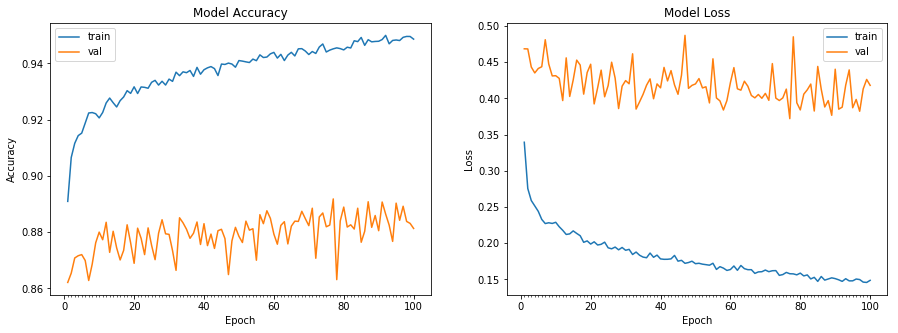

Accuracy on test data is: 88.13


In [21]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1))
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab_Models/'

checkpoint = ModelCheckpoint(root_path+'model_assignment_7_b.best-accuracy.hdfs', save_best_only=True,monitor='val_acc')
callback_list=[checkpoint]

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callback_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
         

In [34]:
model = load_model(root_path+'model_assignment_7_b.best-accuracy.hdfs')
pred = model.predict(test_features[:10])
class_idx = np.argmax(pred[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("activation_14")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([test_features[:10]])


print(conv_layer_output_value, (conv_layer_output_value[0]))

for i in range(3):
    conv_layer_output_value[i] *= pooled_grads_value
    

[[[ 2.9529624  0.7605009  0.        ...  0.         0.         2.2648268]
  [ 9.349897   0.         0.        ...  0.         0.         2.9860458]
  [ 5.8820815  0.         0.        ...  0.         0.         0.       ]
  [18.175556   0.         0.        ...  0.         0.         0.       ]
  [ 0.         0.         0.        ...  0.         0.         0.       ]]

 [[10.581831   0.         2.9148939 ...  0.         0.         5.9016495]
  [22.202648   0.        11.502953  ...  4.5506024  0.         6.7367744]
  [22.953424   0.         0.        ...  0.         0.         0.       ]
  [14.548359   0.        18.031498  ...  0.         0.         0.       ]
  [ 0.         8.996905  36.186943  ...  0.         0.        11.405317 ]]

 [[35.74332    2.3544612  2.4883802 ...  0.         0.        26.19162  ]
  [32.390297   0.        11.802223  ...  0.         0.        28.6663   ]
  [23.022686   0.        19.045036  ...  0.         0.         0.       ]
  [16.501766   0.        40.088287

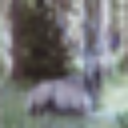

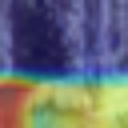

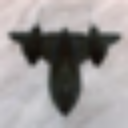

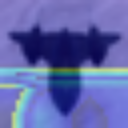

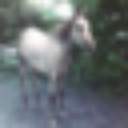

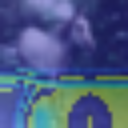

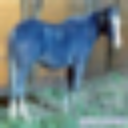

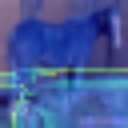

In [35]:
from google.colab.patches import cv2_imshow
(Train_features, Train_labels), (Test_features, Test_labels) = cifar10.load_data()
imgs = []
heatmap_2 = np.mean(conv_layer_output_value, axis=-1)
heatmap_2 = np.maximum(heatmap_2, 0)
heatmap_2 /= np.max(heatmap_2)
for i in range(0,200,66):
  imgs.append(Test_features[i])
imgs = [Test_features[314], Test_features[315], Test_features[316], Test_features[317]]
  
for img in imgs:
  heatmap_2 = cv2.resize(heatmap_2, (img.shape[1], img.shape[0]))
  heatmap_2 = np.uint8(255 * heatmap_2)
  heatmap_2 = cv2.applyColorMap(heatmap_2, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img.astype('float32'), 0.6, heatmap_2.astype('float32'), 0.4, 0)
  img = cv2.resize(img, (128, 128))
  cv2_imshow(img)
  superimposed_img = cv2.resize(superimposed_img, (128,128))
  cv2_imshow(superimposed_img)

#print("\n\n")

